In [19]:
import os

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 30)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

from sklearn import feature_selection, linear_model

from statsmodels.tools.eval_measures import rmse
from sklearn import metrics 

In [13]:
df = pd.read_csv('../datasets/dataset-air-pollution-train.csv')

In [14]:
df

,ID,calm_day,time,temperature,windspeed,windbearing,cloud_cover,precipitation_probability,precipitation_intensity,pressure,HDRES_50,HDRES_100,HDRES_300,HDRES_500,HDRES_1000,HLDRES_50,HLDRES_100,HLDRES_300,HLDRES_500,HLDRES_1000,natural_5000,green_5000,route_500,route_1000,road,NO2
0,1,True,12336.0,15.120000,5.59,1.134464,0.05,0.00,0.0000,1017.510010,2217.580322,12113.785156,139887.515625,425108.03125,1287812.750,2217.580322,12113.785156,139887.515625,425108.03125,1287812.75,18846262.0,19923668.0,946.260620,3854.113281,142.557076,8.0
1,2,False,81594.0,23.430000,2.74,1.518299,0.39,0.00,0.0000,1025.000000,2217.580322,12113.785156,139887.515625,425108.03125,1287812.750,2217.580322,12113.785156,139887.515625,425108.03125,1287812.75,18846262.0,19923668.0,946.260620,3854.113281,142.557076,7.0
2,3,False,59250.0,6.120000,1.18,0.942450,0.98,0.00,0.0000,1017.380005,2217.580322,12113.785156,139887.515625,425108.03125,1287812.750,2217.580322,12113.785156,139887.515625,425108.03125,1287812.75,18846262.0,19923668.0,946.260620,3854.113281,142.557076,46.0
3,4,False,51864.0,-7.890000,2.43,1.228926,1.00,0.00,0.0000,1015.890015,2217.580322,12113.785156,139887.515625,425108.03125,1287812.750,2217.580322,12113.785156,139887.515625,425108.03125,1287812.75,18846262.0,19923668.0,946.260620,3854.113281,142.557076,40.0
4,5,False,50052.0,6.780000,3.28,0.750377,0.82,0.07,0.0610,1000.260010,7725.424805,28270.349609,189823.359375,397490.81250,1631134.125,7725.424805,30901.699219,278115.281250,712298.12500,2722408.25,6488115.0,8294676.5,4355.614746,12716.046875,41.860539,31.0
5,6,False,78048.0,17.459999,2.10,1.343864,0.01,0.00,0.0000,1020.770020,7725.424805,28270.349609,189823.359375,397490.81250,1631134.125,7725.424805,30901.699219,278115.281250,712298.12500,2722408.25,6488115.0,8294676.5,4355.614746,12716.046875,41.860539,26.0
6,7,False,26004.0,25.209999,3.21,-1.204277,0.75,0.00,0.0000,1015.349976,7725.424805,28270.349609,189823.359375,397490.81250,1631134.125,7725.424805,30901.699219,278115.281250,712298.12500,2722408.25,6488115.0,8294676.5,4355.614746,12716.046875,41.860539,4.0
7,8,False,38010.0,3.360000,2.60,1.204277,1.00,0.00,0.0000,1017.030029,2217.580322,12113.785156,139887.515625,425108.03125,1287812.750,2217.580322,12113.785156,139887.515625,425108.03125,1287812.75,18846262.0,19923668.0,946.260620,3854.113281,142.557076,25.0
8,9,True,21192.0,11.350000,0.81,-0.663225,0.88,0.29,0.1600,1020.809998,2217.580322,12113.785156,139887.515625,425108.03125,1287812.750,2217.580322,12113.785156,139887.515625,425108.03125,1287812.75,18846262.0,19923668.0,946.260620,3854.113281,142.557076,6.0
9,10,False,20568.0,15.980000,3.21,0.436332,0.96,0.00,0.0000,1019.330017,2217.580322,12113.785156,139887.515625,425108.03125,1287812.750,2217.580322,12113.785156,139887.515625,425108.03125,1287812.75,18846262.0,19923668.0,946.260620,3854.113281,142.557076,12.0


In [15]:
df.columns

Index([u'ID', u'calm_day', u'time', u'temperature', u'windspeed',
       u'windbearing', u'cloud_cover', u'precipitation_probability',
       u'precipitation_intensity', u'pressure', u'HDRES_50', u'HDRES_100',
       u'HDRES_300', u'HDRES_500', u'HDRES_1000', u'HLDRES_50', u'HLDRES_100',
       u'HLDRES_300', u'HLDRES_500', u'HLDRES_1000', u'natural_5000',
       u'green_5000', u'route_500', u'route_1000', u'road', u'NO2'],
      dtype='object')

In [20]:
# Simplest model = do the mean
df.describe

<bound method DataFrame.describe of           ID  calm_day     time  temperature  windspeed  windbearing  \
0          1      True  12336.0    15.120000       5.59     1.134464   
1          2     False  81594.0    23.430000       2.74     1.518299   
2          3     False  59250.0     6.120000       1.18     0.942450   
3          4     False  51864.0    -7.890000       2.43     1.228926   
4          5     False  50052.0     6.780000       3.28     0.750377   
5          6     False  78048.0    17.459999       2.10     1.343864   
6          7     False  26004.0    25.209999       3.21    -1.204277   
7          8     False  38010.0     3.360000       2.60     1.204277   
8          9      True  21192.0    11.350000       0.81    -0.663225   
9         10     False  20568.0    15.980000       3.21     0.436332   
10        11      True  64602.0    12.240000       5.91     0.732924   
11        12      True  68928.0    12.130000       4.43    -0.803013   
12        13      True  2740

In [16]:
df.corr()

,ID,calm_day,time,temperature,windspeed,windbearing,cloud_cover,precipitation_probability,precipitation_intensity,pressure,HDRES_50,HDRES_100,HDRES_300,HDRES_500,HDRES_1000,HLDRES_50,HLDRES_100,HLDRES_300,HLDRES_500,HLDRES_1000,natural_5000,green_5000,route_500,route_1000,road,NO2
ID,1.000000,-0.001312,0.001078,0.005294,-0.000268,0.006321,-0.006861,-0.000686,0.004805,0.002968,0.007788,0.008210,0.008423,0.006813,0.008110,0.007788,0.007788,0.007788,0.008216,0.007677,-0.007354,-0.007522,0.000575,-0.000150,0.005058,0.003381
calm_day,-0.001312,1.000000,-0.012980,0.008482,0.044751,-0.030382,0.025694,0.000546,-0.000050,-0.014050,-0.000771,-0.000366,0.001346,0.002431,0.001694,-0.000771,-0.000771,-0.000771,-0.000359,-0.000859,0.001087,0.000973,-0.003062,-0.003123,0.002905,-0.146473
time,0.001078,-0.012980,1.000000,0.179564,-0.014733,0.024364,-0.060465,0.200616,0.124921,-0.090089,0.003235,0.003329,0.003106,0.002270,0.002919,0.003235,0.003235,0.003235,0.003330,0.003206,-0.003119,-0.003165,0.000780,0.000503,0.001488,-0.112294
temperature,0.005294,0.008482,0.179564,1.000000,-0.076510,-0.063175,-0.112197,-0.042502,0.011183,-0.069880,-0.000248,-0.000216,-0.000049,0.000094,-0.000008,-0.000248,-0.000248,-0.000248,-0.000216,-0.000254,0.000270,0.000262,-0.000319,-0.000310,0.000180,-0.374351
windspeed,-0.000268,0.044751,-0.014733,-0.076510,1.000000,0.243695,0.229615,0.236489,0.098273,-0.236458,-0.000979,-0.001332,-0.002520,-0.002938,-0.002694,-0.000979,-0.000979,-0.000979,-0.001337,-0.000898,0.000683,0.000792,0.001943,0.002123,-0.002919,-0.319649
windbearing,0.006321,-0.030382,0.024364,-0.063175,0.243695,1.000000,0.036606,0.062258,0.030148,-0.011955,-0.004215,-0.004085,-0.002809,-0.001194,-0.002384,-0.004215,-0.004215,-0.004215,-0.004082,-0.004234,0.004269,0.004254,-0.002724,-0.002438,-0.000003,-0.053138
cloud_cover,-0.006861,0.025694,-0.060465,-0.112197,0.229615,0.036606,1.000000,0.282649,0.177208,-0.238004,-0.001272,-0.001322,-0.001280,-0.000976,-0.001215,-0.001272,-0.001272,-0.001272,-0.001322,-0.001259,0.001217,0.001239,-0.000226,-0.000114,-0.000676,-0.164856
precipitation_probability,-0.000686,0.000546,0.200616,-0.042502,0.236489,0.062258,0.282649,1.000000,0.696021,-0.364389,0.001742,0.001609,0.000776,-0.000054,0.000545,0.001742,0.001742,0.001742,0.001607,0.001767,-0.001827,-0.001798,0.001656,0.001561,-0.000600,-0.148985
precipitation_intensity,0.004805,-0.000050,0.124921,0.011183,0.098273,0.030148,0.177208,0.696021,1.000000,-0.226768,-0.002117,-0.002184,-0.002055,-0.001518,-0.001936,-0.002117,-0.002117,-0.002117,-0.002184,-0.002097,0.002038,0.002069,-0.000480,-0.000297,-0.001008,-0.087752
pressure,0.002968,-0.014050,-0.090089,-0.069880,-0.236458,-0.011955,-0.238004,-0.364389,-0.226768,1.000000,-0.002871,-0.002926,-0.002613,-0.001810,-0.002426,-0.002871,-0.002871,-0.002871,-0.002926,-0.002852,0.002792,0.002824,-0.000891,-0.000653,-0.001095,0.224652


In [74]:
# mean model thing...

# model = smf.ols(formula = 'NO2 ~ 1', data = df).fit()
# # look for high R squared, RMSE is relative to R squared 0 to 1
# model.summary()
# output_df = output_df.assign(NO2= 17.893127)
# output_df

In [78]:
df.columns

Index([u'ID', u'calm_day', u'time', u'temperature', u'windspeed',
       u'windbearing', u'cloud_cover', u'precipitation_probability',
       u'precipitation_intensity', u'pressure', u'HDRES_50', u'HDRES_100',
       u'HDRES_300', u'HDRES_500', u'HDRES_1000', u'HLDRES_50', u'HLDRES_100',
       u'HLDRES_300', u'HLDRES_500', u'HLDRES_1000', u'natural_5000',
       u'green_5000', u'route_500', u'route_1000', u'road', u'NO2'],
      dtype='object')

### Pick a feature for your model
Find a feature that's highly correlated and make it a preditor'

Pressure 0.22

In [54]:
model = smf.ols(formula = 'NO2 ~ pressure', data = df).fit()
# look for high R squared, RMSE is relative to R squared 0 to 1
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1655.
Date:                Tue, 10 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:30:40   Log-Likelihood:            -1.2534e+05
No. Observations:               31133   AIC:                         2.507e+05
Df Residuals:                   31131   BIC:                         2.507e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -352.4151      9.104    -38.710      0.000    -370.259    -334.571
pressure       0.3640      0.009     40.677      0.000       0.346       0.382
==============================================================================
Omnibus:                     9814.400   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30855.355
Skew:                           1.630   Prob(JB):                         0.00
Kurtosis:                       6.628   Cond. No.                     1.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### What are we looking for?
- null hypothesis = no correlation
- pvalue smaller than 0.05


In [40]:
#Ivan's code from class

predict_df = pd.read_csv('../datasets/dataset-air-pollution-test.csv', index_col = 'ID')

# @TODO review! 
predict_X = predict_df[ ['pressure'] ] # run the model on this one feature(s)

# calling the model here with model.predict()
predict_hat_df = pd.DataFrame({'NO2': model.predict(predict_X)}, index = predict_df.index)

predict_hat_df.to_csv('../datasets/clean-air-regressors-first-prediction.csv')

predict_hat_df

,NO2
ID,
31134,19.575188
31135,19.436880
31136,19.546065
31137,21.551515
31138,21.988300
31139,22.679798
31140,23.371340
31141,23.094723
31142,23.265776


### Now, Ivan runs RMSE, and then
Gives us a score - we got an RMSE of 13.489... he knows the ACTUAL values, and so was able to run RMSE

### Now that we have a baseline...
Keep improving on it "can we do better"

In [41]:
model.params

Intercept   -352.415149
pressure       0.363965
dtype: float64

In [42]:
model.tvalues

Intercept   -38.710363
pressure     40.677249
dtype: float64

In [43]:
model.pvalues

Intercept    0.0
pressure     0.0
dtype: float64

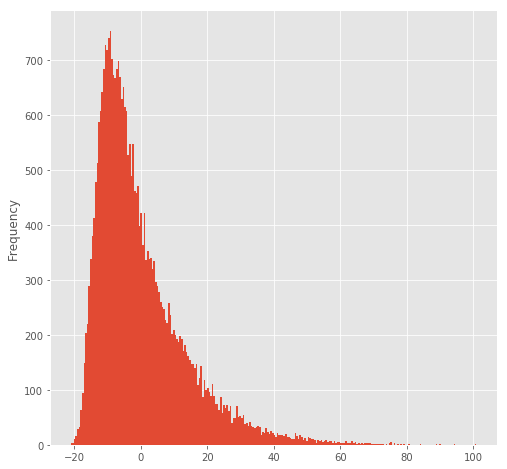

In [46]:
model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

### what is this telling me?
Pressure/NO2 correlation is not normally distribution

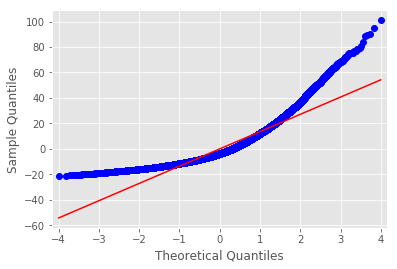

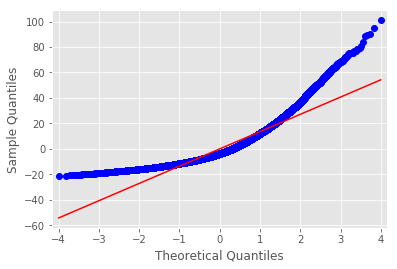

In [44]:
sm.qqplot(model.resid, line = 's')

In [48]:
pd.tools.plotting.scatter_matrix

<function pandas.tools.plotting.wrapper>

### Okay so clearly, its not JUST pressure... correlation

Let's try to do a bunch 

In [51]:
# I'll try a model with cloud_cover + natural_5000
# Model 2 is Edwin = pressure + 
# Model 4 is Holly

model_3 = smf.ols(formula = 'NO2 ~ cloud_cover +  natural_5000 ', data = df).fit()
# look for high R squared, RMSE is relative to R squared 0 to 1
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     791.9
Date:                Tue, 10 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:46:55   Log-Likelihood:            -1.2538e+05
No. Observations:               31133   AIC:                         2.508e+05
Df Residuals:                   31130   BIC:                         2.508e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       25.4054      0.208    122.420      0.000      24.999      25.812
cloud_cover     -6.2819      0.211    -29.785      0.000      -6.695      -5.868
natural_5000  -3.67e-07   1.39e-08    -26.357      0.000   -3.94e-07    -3.4e-07
==============================================================================
Omnibus:                     9686.071   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29468.126
Skew:                           1.623   Prob(JB):                         0.00
Kurtosis:                       6.491   Cond. No.                     4.20e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#Ivan's code from class

predict_df = pd.read_csv('../datasets/dataset-air-pollution-test.csv', index_col = 'ID')

# @TODO review! 
predict_X = predict_df[ ['cloud_cover', 'natural_5000'] ] # run the model on this one feature(s)

# calling the model here with model.predict()
predict_hat_df = pd.DataFrame({'NO2': model_3.predict(predict_X)}, index = predict_df.index)

predict_hat_df.to_csv('../datasets/clean-air-regressors-prediction-3.csv')

predict_hat_df


,NO2
ID,
31134,16.225580
31135,16.225580
31136,16.225580
31137,20.497258
31138,21.816453
31139,18.549876
31140,20.497258
31141,16.225580
31142,17.356319


### 8:16 PM

YOU SHOULD RUN A LOT OF PLOTS TO PLAY/EXPERIMENT

This is where the human hindsight comes into play

In [60]:

model_4 = smf.ols(formula = 'NO2 ~ cloud_cover *  natural_5000 ', data = df).fit()
# look for high R squared, RMSE is relative to R squared 0 to 1
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     544.0
Date:                Tue, 10 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:41:51   Log-Likelihood:            -1.2536e+05
No. Observations:               31133   AIC:                         2.507e+05
Df Residuals:                   31129   BIC:                         2.508e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   26.9741      0.311     86.737      0.000      26.365      27.584
cloud_cover                 -9.1420      0.472    -19.361      0.000     -10.068      -8.217
natural_5000             -5.087e-07   2.51e-08    -20.240      0.000   -5.58e-07   -4.59e-07
cloud_cover:natural_5000  2.582e-07   3.81e-08      6.769      0.000    1.83e-07    3.33e-07
==============================================================================
Omnibus:                     9572.038   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28694.086
Skew:                           1.609   Prob(JB):                         0.00
Kurtosis:                       6.430   Cond. No.                     1.01e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#Ivan's code from class

predict_df = pd.read_csv('../datasets/dataset-air-pollution-test.csv', index_col = 'ID')

# @TODO review! 
predict_X = predict_df[ ['cloud_cover', 'natural_5000'] ] # run the model on this one feature(s)

# calling the model here with model.predict()
predict_hat_df = pd.DataFrame({'NO2': model_4.predict(predict_X)}, index = predict_df.index)

predict_hat_df.to_csv('../datasets/clean-air-regressors-prediction-4.csv')

predict_hat_df

,NO2
ID,
31134,15.854256
31135,15.854256
31136,15.854256
31137,20.684482
31138,22.176169
31139,18.482467
31140,20.684482
31141,15.854256
31142,17.132845


In [93]:
model_4 = smf.ols(formula = 'NO2 ~ time + cloud_cover * precipitation_probability * precipitation_intensity * natural_5000 * temperature * windspeed * windbearing * HDRES_1000 * road * calm_day ', data = df).fit()
# look for high R squared, RMSE is relative to R squared 0 to 1
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     45.59
Date:                Tue, 10 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:20:11   Log-Likelihood:            -1.1918e+05
No. Observations:               31133   AIC:                         2.391e+05
Df Residuals:                   30751   BIC:                         2.423e+05
Df Model:                         381                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================================================================
                                                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                     -1.078e-14   2.83e-16    -38.040      0.000   -1.13e-14   -1.02e-14
calm_day[T.True]                                                                                                                               8.573e-09    2.8e-09      3.065      0.002    3.09e-09    1.41e-08
time                                                                                                                                          -8.798e-06   2.86e-06     -3.078      0.002   -1.44e-05    -3.2e-06
cloud_cover                                                                                                                                    3.717e-09   1.21e-09      3.079      0.002    1.35e-09    6.08e-09
cloud_cover:calm_day[T.True]                                                                                                                   9.924e-09   3.22e-09      3.084      0.002    3.62e-09    1.62e-08
precipitation_probability                                                                                                                     -1.771e-09   5.72e-10     -3.094      0.002   -2.89e-09   -6.49e-10
precipitation_probability:calm_day[T.True]                                                                                                     2.238e-09   7.23e-10      3.095      0.002    8.21e-10    3.66e-09
cloud_cover:precipitation_probability                                                                                                          3.281e-10   1.06e-10      3.088      0.002     1.2e-10    5.36e-10
cloud_cover:precipitation_probability:calm_day[T.True]                                                                                         1.151e-09   3.73e-10      3.086      0.002     4.2e-10    1.88e-09
precipitation_intensity                                                                                                                       -1.027e-08   3.34e-09     -3.075      0.002   -1.68e-08   -3.72e-09
precipitation_intensity:calm_day[T.True]                                                                                                       2.686e-09   8.72e-10      3.080      0.002    9.77e-10    4.39e-09
cloud_cover:precipitation_intensity                                                                                                            

In [94]:



#Ivan's code from class

predict_df = pd.read_csv('../datasets/dataset-air-pollution-test.csv', index_col = 'ID')

# @TODO review! 
predict_X = predict_df[ ['precipitation_probability', 'precipitation_intensity', 'time', 'cloud_cover', 'natural_5000', 'temperature', 'windspeed', 'windbearing', 'HDRES_1000', 'road', 'calm_day'] ] # run the model on this one feature(s)

# calling the model here with model.predict()
predict_hat_df = pd.DataFrame({'NO2': model_4.predict(predict_X)}, index = predict_df.index)

predict_hat_df.to_csv('../datasets/clean-air-regressors-prediction-9.csv')

predict_hat_df

,NO2
ID,
31134,15.479969
31135,18.882324
31136,24.432428
31137,25.051536
31138,28.770019
31139,36.584206
31140,39.923610
31141,19.532207
31142,32.497516
